<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Classification - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review. 

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis? 
3. Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques? 




## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


In [1]:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')

Read your chosen dataset into pandas dataframe:


Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*  A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*  Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*  Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data


Data Features

The dataset consists of customer information, and the columns you’ve selected are:

- Gender: Categorical feature (Male or Female). It’s important to note that K-Means and many clustering algorithms require numerical data, so this needs to be converted to a numerical format.
- Age: Continuous feature representing the age of the customer. It is a numerical feature, and we can leave it as-is for clustering.
- Annual Income (k$): Continuous feature that represents the annual income of the customer, measured in thousands of dollars. This is also numerical.
- Spending Score (1-100): Continuous feature that represents a customer’s spending behavior, rated on a scale from 1 to 100. This is also numerical.

# 2. Objectives


The objective of this analysis is to classify customers into distinct groups based on their demographic and behavioral characteristics, such as age, income, and spending score, using K-Means clustering. The goal is to identify meaningful segments that can be targeted with tailored marketing strategies to enhance customer engagement and optimize business decisions.

## Data Exploration

In [2]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
df.duplicated().sum()

0

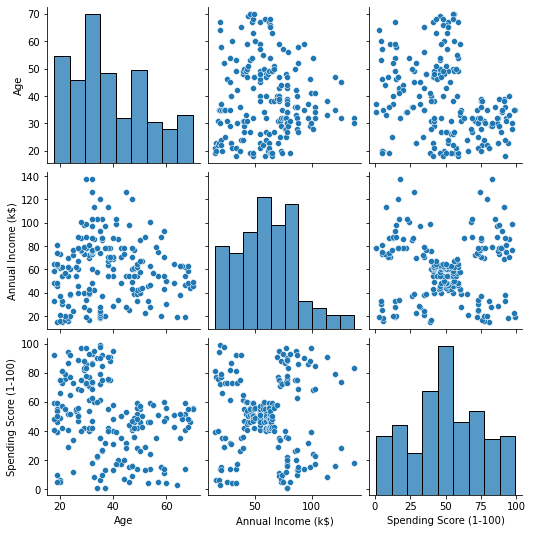

In [7]:
import seaborn as sns
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Annual Income (k$)'}>],
       [<AxesSubplot:title={'center':'Spending Score (1-100)'}>,
        <AxesSubplot:>]], dtype=object)

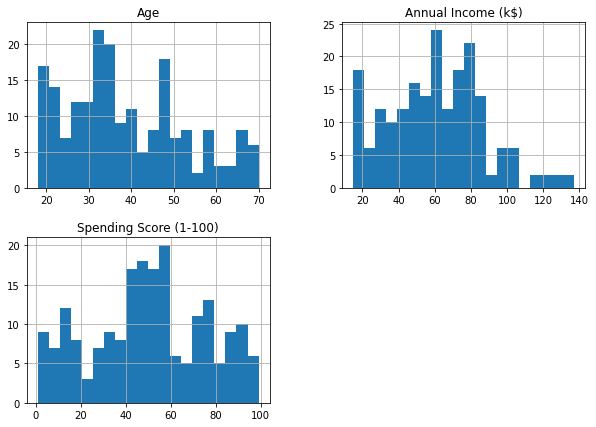

In [8]:
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].hist(bins=20, figsize=(10, 7))

<AxesSubplot:xlabel='Spending Score (1-100)'>

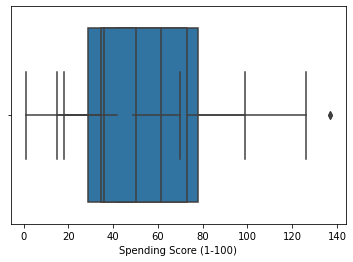

In [9]:
sns.boxplot(x=df['Age'])
sns.boxplot(x=df['Annual Income (k$)'])
sns.boxplot(x=df['Spending Score (1-100)'])

In [10]:
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


# 3. Logistic Regression Models


In [11]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [12]:
from sklearn.preprocessing import StandardScaler

X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


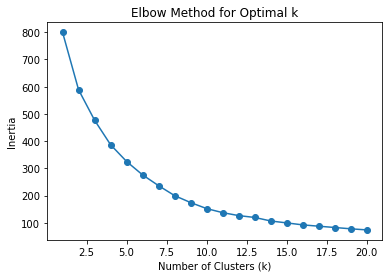

In [14]:
inertia = []
k_range = range(1, 21)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [27]:
kmeans = KMeans(n_clusters=11, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

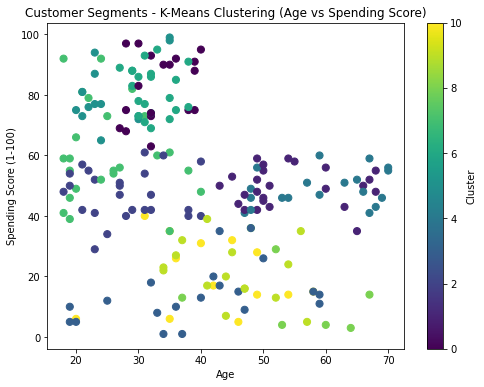

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis', s=50)
plt.title('Customer Segments - K-Means Clustering (Age vs Spending Score)')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.show()

In [29]:
cluster_centers = kmeans.cluster_centers_
print("Cluster Centers:\n", cluster_centers)

Cluster Centers:
 [[-1.12815215 -0.39989994  1.01344075  1.26040667]
 [ 0.88640526  1.09300668 -0.27940022 -0.02639866]
 [ 0.88640526 -0.78153925 -0.12214217 -0.11957041]
 [-1.12815215  0.04664835  0.93858626 -1.40339942]
 [-1.12815215  1.46876196 -0.23833795 -0.03841291]
 [ 0.88640526 -0.96084556 -1.33087991  1.17778643]
 [ 0.88640526 -0.47793198  0.97284787  1.22158511]
 [-1.12815215 -0.97602698 -0.73705168  0.41603773]
 [-1.12815215  1.1180225  -1.3136827  -1.37761081]
 [ 0.88640526  0.41265847  1.21277    -1.11029664]
 [ 0.88640526  0.19294198 -1.2985827  -1.14553467]]


In [30]:
cluster_analysis = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_analysis)

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        33.277778           87.111111               82.666667
1        54.080000           53.240000               49.520000
2        27.960000           57.360000               47.120000
3        39.500000           85.150000               14.050000
4        59.315789           54.315789               49.210526
5        25.461538           25.692308               80.538462
6        32.190476           86.047619               81.666667
7        25.250000           41.250000               60.916667
8        54.428571           26.142857               14.714286
9        44.600000           92.333333               21.600000
10       41.538462           26.538462               20.692308


# Mean Shift

In [32]:
from sklearn.cluster import MeanShift

X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]  # Select the relevant features

mean_shift = MeanShift()
mean_shift.fit(X)

df['Cluster'] = mean_shift.labels_

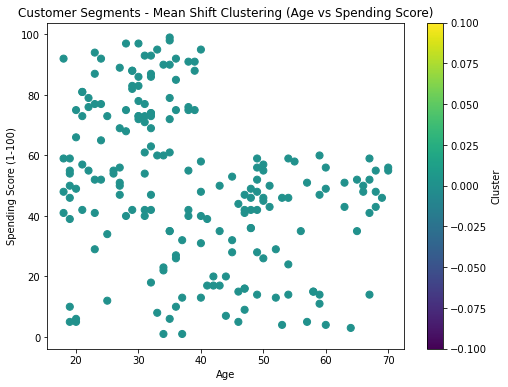

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis', s=50)
plt.title('Customer Segments - Mean Shift Clustering (Age vs Spending Score)')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.show()

In [34]:
cluster_centers = mean_shift.cluster_centers_
print("Cluster Centers:\n", cluster_centers)

Cluster Centers:
 [[40.86324786 56.36752137 50.16239316]]


In [35]:
n_clusters = len(set(mean_shift.labels_))
print(f"Number of clusters found: {n_clusters}")

Number of clusters found: 1


# DBSCAN

In [36]:
from sklearn.cluster import DBSCAN

In [37]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [38]:
dbscan = DBSCAN(eps=10, min_samples=5)
df['Cluster'] = dbscan.fit_predict(X)

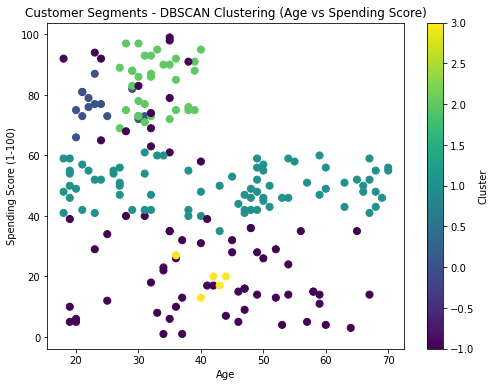

In [39]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis', s=50)
plt.title('Customer Segments - DBSCAN Clustering (Age vs Spending Score)')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.show()

In [40]:
n_clusters = len(set(df['Cluster'])) - (1 if -1 in df['Cluster'].values else 0)
n_outliers = list(df['Cluster']).count(-1)

print(f"Number of clusters: {n_clusters}")
print(f"Number of outliers: {n_outliers}")

Number of clusters: 4
Number of outliers: 69


# Kernel PCA

In [41]:
from sklearn.decomposition import KernelPCA

In [42]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [43]:
kpca = KernelPCA(kernel='rbf', gamma=0.1)
X_kpca = kpca.fit_transform(X) 

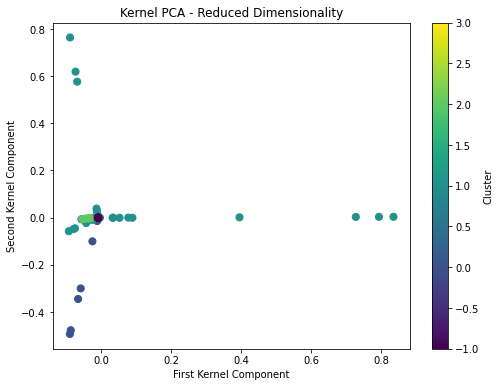

In [44]:
plt.figure(figsize=(8, 6))
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.title('Kernel PCA - Reduced Dimensionality')
plt.xlabel('First Kernel Component')
plt.ylabel('Second Kernel Component')
plt.colorbar(label='Cluster')
plt.show()

In [46]:
kpca_linear = KernelPCA(kernel='linear')
X_kpca_linear = kpca_linear.fit_transform(X)

In [47]:
kpca_poly = KernelPCA(kernel='poly', degree=3) 
X_kpca_poly = kpca_poly.fit_transform(X)

In [48]:
kpca_rbf = KernelPCA(kernel='rbf', gamma=0.1) 
X_kpca_rbf = kpca_rbf.fit_transform(X)

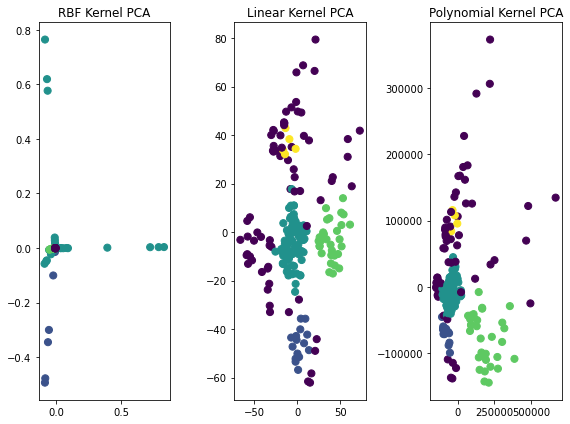

In [49]:
plt.figure(figsize=(8, 6))

# For RBF Kernel
plt.subplot(1, 3, 1)
plt.scatter(X_kpca_rbf[:, 0], X_kpca_rbf[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.title('RBF Kernel PCA')

# For Linear Kernel
plt.subplot(1, 3, 2)
plt.scatter(X_kpca_linear[:, 0], X_kpca_linear[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.title('Linear Kernel PCA')

# For Polynomial Kernel
plt.subplot(1, 3, 3)
plt.scatter(X_kpca_poly[:, 0], X_kpca_poly[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.title('Polynomial Kernel PCA')

plt.tight_layout()
plt.show()

# 4. Insights and key findings


1. KMeans Clustering

KMeans clustering divides the customers into 11 clusters based on the features Age, Annual Income (k$), and Spending Score (1-100). Here are the key insights from the cluster centers:

Cluster Centers:
- Cluster 0: Age = 33.3, Income = 87.1k, Spending = 82.7.
- Cluster 1: Age = 54.1, Income = 53.2k, Spending = 49.5.
- Cluster 2: Age = 28.0, Income = 57.4k, Spending = 47.1.
- Cluster 3: Age = 39.5, Income = 85.2k, Spending = 14.1.
- Cluster 4: Age = 59.3, Income = 54.3k, Spending = 49.2.
- Cluster 5: Age = 25.5, Income = 25.7k, Spending = 80.5.
- Cluster 6: Age = 32.2, Income = 86.0k, Spending = 81.7.
- Cluster 7: Age = 25.3, Income = 41.3k, Spending = 60.9.
- Cluster 8: Age = 54.4, Income = 26.1k, Spending = 14.7.
- Cluster 9: Age = 44.6, Income = 92.3k, Spending = 21.6.
- Cluster 10: Age = 41.5, Income = 26.5k, Spending = 20.7.

Key Observations:

- High Spending vs. Low Spending: There is a clear distinction between high spending clusters (e.g., Cluster 0, Cluster 6) and low spending clusters (e.g., Cluster 3, Cluster 8). This can help businesses identify segments of customers with different spending behaviors.
- Age Segmentation: There is variation in age across clusters, with clusters like 0, 6, and 7 having younger customers (around early 30s) and clusters like 1 and 4 representing older demographics (around 50s to 60s).
- Income Distribution: Some clusters represent high-income groups (e.g., Cluster 9), while others represent more moderate or low-income groups (e.g., Cluster 5, Cluster 8).
- This clustering could be useful for targeting specific customer groups with tailored marketing strategies, such as offering high-end products to high-income customers or focusing on affordability for the lower-income groups.

2. MeanShift Clustering

MeanShift has identified 1 cluster in your dataset, which suggests that the data points are not strongly divided into multiple groups based on their density. Here are the observations:

Cluster Center:
- MeanShift finds one central point at [40.86, 56.37, 50.16], which indicates that, despite variations in individual data points, the majority of data points are around this central value.

Key Observations:
- The data might be more homogeneous than expected, meaning that there is not a significant separation between customer groups based on the features used. This result might indicate that the customers are relatively similar when considering age, income, and spending score together.

3. DBSCAN Clustering

DBSCAN identified 4 clusters and 69 outliers. DBSCAN is a density-based clustering method, which is more sensitive to the shape and density of clusters.

- Number of Clusters: 4
- Number of Outliers: 69

Key Observations:

- Outliers: A large number of outliers (69) indicates that many customers do not fit well into any of the identified clusters, potentially due to being unusual in terms of the features. Outliers could represent customers with extreme values (either very high or low spending, income, or age), which are not similar to the majority of the customer base.
- Clusters: The 4 identified clusters might represent meaningful groups in the dataset, but the presence of outliers suggests that these clusters are not well-defined or might be subject to further refinement.
This result implies that DBSCAN may work well for identifying well-defined, dense groups in a dataset but could struggle with more scattered or noisy data.

4. Kernel PCA for Dimensionality Reduction

Kernel PCA is a non-linear dimensionality reduction method that can capture complex relationships between features, which may not be linearly separable.

Key Observations:

- Data Representation: Using Kernel PCA, you can reduce the dataset into fewer dimensions (for visualization, typically 2 or 3 dimensions), and visualize how the clusters are spread in a transformed space.
Cluster Separation: Kernel PCA could make non-linear separations between clusters more apparent, especially when the relationships between the features are more complex than what traditional PCA or linear methods can capture.
Feature Transformation: Kernel PCA would highlight the underlying structure of the data that is hidden in higher-dimensional space, which could help in better understanding the clustering results (e.g., the 4 clusters in DBSCAN or the 11 clusters in KMeans).

Conclusions and Key Findings

Clustering Diversity:

- KMeans has found 11 distinct clusters, which suggests that there are distinct groups of customers that differ in their age, income, and spending behaviors.
- MeanShift has only identified one cluster, indicating that the data might not be divided into multiple dense regions based on the current features.
- DBSCAN found 4 clusters with a significant number of outliers, suggesting that many data points do not conform to the dense clusters and may be atypical in terms of their features.

Marketing Segmentation:

- The 11 clusters from KMeans are ideal for customer segmentation, where each cluster could represent a unique group of customers with similar behaviors. Tailored marketing or product offerings can be designed for each cluster based on their age, income, and spending behavior.
- DBSCAN and MeanShift suggest that the overall customer base is relatively homogeneous, though DBSCAN identifies outliers that could be considered for special campaigns or research.

Feature Relevance:

- The analysis suggests that age, income, and spending score are useful features for clustering customers, but further investigation of other potential features could help refine the clusters, especially in the case of DBSCAN, where outliers are significant.

Model Choice:

- KMeans provides the most granular segmentation with 11 clusters, but may not be ideal for handling outliers or non-linear relationships.
- DBSCAN and MeanShift might be more suitable when dealing with data that contains noise or non-linear structures.

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
